In [752]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

df = pd.read_csv("salary.csv")

In [753]:
# Exploratory data analysis

In [754]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [755]:
df.shape

(30, 2)

In [756]:
df.isnull().values.any()


False

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


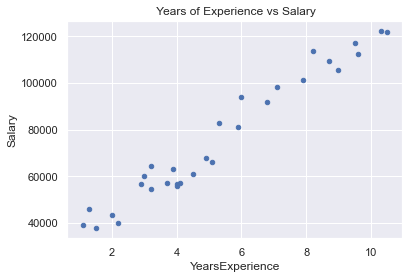

In [757]:
df.plot.scatter(x='YearsExperience', y='Salary', title=' Years of Experience vs Salary');


In [758]:
print(df.corr())

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


In [759]:
print(df.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [760]:
y = df['Salary'].values.reshape(-1, 1)
X = df['YearsExperience'].values.reshape(-1, 1)

In [761]:
print(df['Salary'].values) 

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [762]:
print(df['Salary'].values.shape)

(30,)


In [763]:
print(X.shape) 

(30, 1)


In [764]:
print(X)  

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [765]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [766]:
RS = 12

In [767]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RS)

In [768]:
print(X_train)

[[ 2.2]
 [ 4.9]
 [ 8.2]
 [ 3.7]
 [ 6.8]
 [ 3.2]
 [ 6. ]
 [ 1.1]
 [ 3.9]
 [10.3]
 [10.5]
 [ 9. ]
 [ 4.1]
 [ 2.9]
 [ 9.5]
 [ 5.1]
 [ 4. ]
 [ 8.7]
 [ 2. ]
 [ 1.5]
 [ 5.3]
 [ 3. ]
 [ 9.6]
 [ 4. ]]


In [769]:
print(y_train)

[[ 39891.]
 [ 67938.]
 [113812.]
 [ 57189.]
 [ 91738.]
 [ 64445.]
 [ 93940.]
 [ 39343.]
 [ 63218.]
 [122391.]
 [121872.]
 [105582.]
 [ 57081.]
 [ 56642.]
 [116969.]
 [ 66029.]
 [ 56957.]
 [109431.]
 [ 43525.]
 [ 37731.]
 [ 83088.]
 [ 60150.]
 [112635.]
 [ 55794.]]


In [770]:
# LINEAR REGRESSION MODEL

In [771]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [772]:
regressor.fit(X_train, y_train)

LinearRegression()

In [773]:
print(regressor.intercept_)

[25243.60315168]


In [774]:
print(regressor.coef_)


[[9509.9963271]]


In [775]:
def calc(slope, intercept, YearsExperience):
    return slope*YearsExperience+intercept
score = calc(regressor.coef_, regressor.intercept_, 5)
print(score)

[[72793.58478719]]


In [776]:
score = regressor.predict([[1]])
print(score)

[[34753.59947878]]


In [777]:
y_pred = regressor.predict(X_test)

In [778]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

     Actual      Predicted
0   54445.0   55675.591398
1  101302.0  100372.574136
2   81363.0   81352.581482
3   61111.0   68038.586624
4   46205.0   37606.598377
5   98273.0   92764.577074


In [779]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [780]:
import numpy as np


In [781]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [782]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 3867.47
Mean squared error: 25774164.37
Root mean squared error: 5076.83
